In [1]:
import pandas, seaborn, scipy, numpy, matplotlib, collections, sklearn, math

%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500



%matplotlib inline
%config InlineBackend.figure_format = 'png'

matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)
matplotlib.rc('text', usetex=True)
#reload(c)

pandas.set_option('display.max_rows', 500)
pandas.set_option('display.max_columns', 500)

def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')
    
def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values)
    if numpy.nan in bars:
        return pattern % numpy.mean(values)
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2)) 
    return (pattern + " (" + pattern + " - " + pattern + ")") % ((numpy.mean(values),) + bars)


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sources = pandas.read_csv("../data/derived/sources.full.csv", index_col="source_id")


In [3]:
df = pandas.read_csv("../data/derived/deconstructsigs_output.csv", index_col=0)
df.columns = [x.replace(".", " ").replace("  ", " ") for x in df.columns]
df["kind"] = [x.split()[-1] for x in df.Sample]
df["source_id"] = [x.split()[0] for x in df.Sample]
del df["Sample"]
df = df.set_index(["source_id", "kind"], drop=False)
df = df.loc[:,(df != 0).any(axis=0)]
signatures = sorted([x for x in df.columns if x not in ('kind', 'source_id')], key=lambda x: x[0])
df["treated"] = [sources.ix[s].treated if s in sources.index else False for s in df.source_id]
df.to_csv("../data/derived/deconstructsigs_output.cleaned.csv")
df

,,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 8,Signature 9,Signature 10,Signature 12,Signature 13,Signature 14,Signature 16,Signature 17,Signature 18,Signature 19,Signature 22,Signature 23,Signature 25,Signature 26,Signature 29,Signature 30,Cisplatin Gallus gallus,Cyclophosphamide Gallus gallus,Etoposide Gallus gallus,Cisplatin C Elegans wildtype,Cisplatin C Elegans fcd 2,Cisplatin C Elegans polq 1,Cisplatin C Elegans slx 1,Cisplatin C Elegans xpf 1,kind,source_id,treated
source_id,kind,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-166-1-2,all,0.000000,0.000000,0.000000,0.000000,0.000000,0.063935,0.000000,0.247811,0.000000,0.514944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-166-1-2,False
AOCS-092-3-3,new,0.000000,0.000000,0.126669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100058,0.115032,0.152028,0.000000,0.000000,0.000000,0.000000,0.076661,0.183630,0.000000,0.000000,0.000000,0.000000,0.000000,0.104022,new,AOCS-092-3-3,True
AOCS-119-3-9,all,0.000000,0.000000,0.225905,0.000000,0.000000,0.000000,0.492567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.075285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-119-3-9,True
AOCS-150-3-1,all,0.000000,0.000000,0.326017,0.000000,0.000000,0.000000,0.210232,0.000000,0.000000,0.000000,0.000000,0.000000,0.079109,0.000000,0.000000,0.086462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058538,0.000000,0.000000,0.068350,0.000000,0.000000,0.000000,all,AOCS-150-3-1,True
AOCS-088-1-0,all,0.000000,0.000000,0.334240,0.000000,0.000000,0.000000,0.433015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-088-1-0,False
AOCS-034-3-8,new,0.000000,0.000000,0.346249,0.000000,0.000000,0.000000,0.079037,0.000000,0.000000,0.000000,0.183618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111080,0.000000,0.000000,0.000000,0.000000,0.000000,0.056729,0.000000,0.000000,0.084188,0.000000,0.000000,0.000000,new,AOCS-034-3-8,True
AOCS-088-3-8,all,0.000000,0.000000,0.367190,0.000000,0.000000,0.000000,0.359671,0.000000,0.000000,0.000000,0.062041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-088-3-8,True
AOCS-086-3-2,new,0.000000,0.000000,0.382183,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050777,0.000000,0.000000,0.000000,0.000000,0.116507,0.000000,0.000000,0.076147,0.000000,0.000000,0.118519,0.000000,0.000000,0.067353,0.000000,0.000000,0.000000,new,AOCS-086-3-2,True
AOCS-148-1-4,all,0.000000,0.000000,0.396767,0.000000,0.000000,0.000000,0.218346,0.000000,0.000000,0.000000,0.000000,0.000000,0.079127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,all,AOCS-148-1-4,False


In [4]:
df.ix[df.kind == "control"]
df.kind.unique()

array(['all', 'new'], dtype=object)

In [5]:
pandas.read_csv("../data/deconstructsigs_output.csv", index_col=0)

,Signature.1,Signature.2,Signature.3,Signature.4,Signature.5,Signature.6,Signature.7,Signature.8,Signature.9,Signature.10,Signature.11,Signature.12,Signature.13,Signature.14,Signature.15,Signature.16,Signature.17,Signature.18,Signature.19,Signature.20,Signature.21,Signature.22,Signature.23,Signature.24,Signature.25,Signature.26,Signature.27,Signature.28,Signature.29,Signature.30,Cisplatin..Gallus.gallus,Cyclophosphamide..Gallus.gallus,Etoposide..Gallus.gallus,Cisplatin..C..Elegans.wildtype,Cisplatin..C..Elegans.fan.1,Cisplatin..C..Elegans.fcd.2,Cisplatin..C..Elegans.lig.4,Cisplatin..C..Elegans.lig.4..fcd.2,Cisplatin..C..Elegans.mus.81,Cisplatin..C..Elegans.polq.1,Cisplatin..C..Elegans.slx.1,Cisplatin..C..Elegans.xpf.1,Sample
106,0.000000,0.000000,0.000000,0.000000,0.000000,0.064167,0,0.000000,0.248261,0.000000,0,0.514255,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0,0.000000,0.098025,0,0,0.000000,0,0.000000,0.000000,0.000000,0,0,0.000000,0,0,0,0.000000,0.000000,0.000000,AOCS-166-1/SP102133 all
122,0.000000,0.000000,0.127945,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.100143,0,0,0.113268,0.153956,0,0.000000,0.000000,0,0,0.000000,0,0.066493,0.180124,0.000000,0,0,0.000000,0,0,0,0.000000,0.000000,0.104487,AOCS-092-13/SP101630 new
60,0.000000,0.000000,0.220021,0.000000,0.000000,0.000000,0,0.491730,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.072806,0,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0,0.000000,0.000000,0.000000,0,0,0.000000,0,0,0,0.000000,0.000000,0.000000,AOCS-119-13/SP101732 all
92,0.000000,0.000000,0.306756,0.000000,0.000000,0.000000,0,0.225304,0.000000,0.000000,0,0.000000,0.052701,0.000000,0,0.083542,0.000000,0.000000,0.073329,0,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0,0.000000,0.061546,0.000000,0,0,0.065677,0,0,0,0.000000,0.000000,0.000000,AOCS-150-13/SP102010 all
31,0.000000,0.000000,0.340294,0.000000,0.000000,0.000000,0,0.424956,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0,0.000000,0.000000,0.000000,0,0,0.000000,0,0,0,0.000000,0.000000,0.000000,AOCS-088-1/SP101610 all
116,0.000000,0.000000,0.347748,0.000000,0.000000,0.000000,0,0.074995,0.000000,0.000000,0,0.000000,0.182393,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.113047,0,0.000000,0.000000,0,0,0.000000,0,0.000000,0.059633,0.000000,0,0,0.082567,0,0,0,0.000000,0.000000,0.000000,AOCS-034-13/SP101524 new
32,0.000000,0.000000,0.375291,0.000000,0.000000,0.000000,0,0.354393,0.000000,0.000000,0,0.000000,0.060113,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0,0.000000,0.000000,0.000000,0,0,0.000000,0,0,0,0.000000,0.000000,0.000000,AOCS-088-13/SP101612 all
119,0.000000,0.000000,0.391987,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.051883,0.000000,0.000000,0.000000,0,0,0.000000,0.114982,0,0.000000,0.000000,0,0,0.074220,0,0.000000,0.117568,0.000000,0,0,0.064917,0,0,0,0.000000,0.000000,0.000000,AOCS-086-13/SP101606 new
50,0.000000,0.000000,0.397790,0.000000,0.064782,0.000000,0,0.180141,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.055001,0.000000,0.000000,0.000000,0,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0,0.000000,0.000000,0.000000,0,0,0.000000,0,0,0,0.000000,0.000000,0.000000,AOCS-107-1/SP101674 all
44,0.000000,0.000000,0.400892,0.000000,0.000000,0.000000,0,0.216738,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.067145,0,0,0.000000,0.000000,0,0.000000,0.000000,0,0,0.000000,0,0.000000,0.000000,0.000000,0,0,0.000000,0,0,0,0.000000,0.000000,0.000000,AOCS-095-13/SP101650 all


In [6]:
def make_draw_df(draw_df):
    signature_descriptions = {
        1: 'Age',
        3: 'BRCA',
        4: 'Smoking',
        6: 'MMR',
        9: 'AID',
        10: 'POLE',
        13: 'AID',
        #22: 'Arist.',
        26: 'MMR',
        29: 'Tobacco',
    }
    column_renames = {
        'Cisplatin Gallus gallus': "Cisplatin \\textit{Gallus gallus}",
        'Chicken cyclophosphamide': 'Cyc.',
        'Chicken etoposide': 'Etoposide',
    }
    column_renames.update(
        dict(("Signature %d" % num, ("(%d) %s" % (num, signature_descriptions.get(num, ''))).strip())
                  for num in range(30)))
    '''
    if 'treated' in draw_df.columns:
        draw_df["treated"] = (draw_df.treated == True).astype(float)
        draw_df["unique"] = (draw_df.kind == "new").astype(float)
        draw_df["control"] = (draw_df.kind == "check").astype(float)
        draw_df = draw_df[["treated", "unique", "control"] + signatures]
    else:
        draw_df = draw_df[signatures]
    '''

    draw_df.index = [x[0] for x in draw_df.index]
    draw_df = draw_df.ix[sorted(draw_df.index)]
    draw_df.columns = [
        column_renames.get(x, x)
        .replace("Gallus gallus", "\\textit{G. gallus}")
        .replace("Gallus gallus", "\\textit{G. gallus}")
        .replace("C Elegans", "\\textit{C. Elegans}")
        .replace("fcd 2", "\\textit{fcd-2$^-$}")
        .replace("xpf 1", "\\textit{xpf-1$^-$}")
        .replace("slx 1", "\\textit{slx-1$^-$}")
        .replace("polq 1", "\\textit{polq-1$^-$}")
        for x in draw_df.columns
    ]
    return draw_df

In [7]:
treatments_df = pandas.read_csv("../data/treatments.csv").dropna()
donor_to_treatments = collections.defaultdict(set)
for (i, row) in treatments_df.iterrows():
    donor_to_treatments[row.submitted_donor_id].add(row["DRUG NAME"])
counts = treatments_df["DRUG NAME"].value_counts()
donor_to_treatments = dict(
    (key, sorted(value, key=counts.get, reverse=True))
     for (key, value) in donor_to_treatments.items())
donor_to_treatments

donors = sorted(sources.donor)
counts = treatments_df["DRUG NAME"].value_counts()
treatment_matrix_df = pandas.DataFrame(
    collections.OrderedDict(
        (drug, [
                row.treated and drug in donor_to_treatments.get(row.donor, []) for (_, row) in sources.iterrows()
        ]) for drug in counts.index),
    index=sources.index)
treatment_matrix_df.to_csv("../data/treatments_matrix.csv")
treatment_matrix_df

,carboplatin,paclitaxel,liposomal doxorubicin,gemcitabine,cyclophosphamide,topotecan,cisplatin,olaparib,bevacizumab,docetaxel,etoposide,farletuzumab/placebo,nab-paclitaxel
source_id,,,,,,,,,,,,,
AOCS-001-1-7,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-004-1-5,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-005-1-8,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-034-1-0,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-034-3-8,True,True,True,True,False,True,False,False,False,False,False,False,False
AOCS-055-1-7,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-056-1-X,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-057-1-2,False,False,False,False,False,False,False,False,False,False,False,False,False
AOCS-058-1-5,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
signatures

['Cisplatin Gallus gallus',
 'Cyclophosphamide Gallus gallus',
 'Cisplatin C Elegans wildtype',
 'Cisplatin C Elegans fcd 2',
 'Cisplatin C Elegans polq 1',
 'Cisplatin C Elegans slx 1',
 'Cisplatin C Elegans xpf 1',
 'Etoposide Gallus gallus',
 'Signature 1',
 'Signature 2',
 'Signature 3',
 'Signature 4',
 'Signature 5',
 'Signature 6',
 'Signature 8',
 'Signature 9',
 'Signature 10',
 'Signature 12',
 'Signature 13',
 'Signature 14',
 'Signature 16',
 'Signature 17',
 'Signature 18',
 'Signature 19',
 'Signature 22',
 'Signature 23',
 'Signature 25',
 'Signature 26',
 'Signature 29',
 'Signature 30']

In [9]:
symbols = {
    'exact': '$*$',
    'partial': '$*$',
    'mismatch': '$?$',
}

def make_symbol_labels(sigs, treats):
    result = []
    for (col_num, signature) in enumerate(sigs.columns):
        cisplatin_sig = 'cisplatin' in signature.lower()
        cyc_sig = 'cyclophosphamide' in signature.lower()
        etoposide_sig = 'etoposide' in signature.lower()
        for (row_num, sample) in enumerate(sigs[signature].index):
            if sigs[signature][sample] > 0:
                sample_treatments = set(treats.columns[treats.ix[sample]])
                symbol = None
                if cisplatin_sig:
                    if "cisplatin" in sample_treatments:
                        symbol = symbols["exact"]
                    elif any('platin' in t for t in sample_treatments):
                        symbol = symbols["partial"]
                    else:
                        symbol = symbols["mismatch"]
                if cyc_sig:
                    if 'cyclophosphamide' in sample_treatments:
                        symbol = symbols["exact"]
                    else:
                        symbol = symbols["mismatch"]
                if etoposide_sig:
                    if 'etoposide' in sample_treatments:
                        symbol = symbols["exact"]
                    else:
                        symbol = symbols["mismatch"]
                if symbol is not None:
                    result.append((row_num, col_num, symbol))   
    return result

def draw_from_chunks(chunks, figsize, cbar=True, cbar_bbox_to_anchor=(-0.125, 7.25, 1.05, 0.95), symbols=False, small_fontsize=4, extra_signature_vlines=[], binarize=False, symbol_text_kwargs={}):
    col_removes = [col for col in chunks[0][1].columns if all(c[col].sum() == 0 for (_, c) in chunks)]
    print("Removing columns: %s" % ', '.join(col_removes))
    for col in col_removes:
        for (_, chunk) in chunks:
            del chunk[col]
    
    signatures = sorted(
        [c for c in chunks[0][1].columns if c not in ('source_id', 'treated', 'unique', 'control', 'kind')],
        key=lambda x: ('Signature' in x))
    
    seaborn.set_context('paper')
    seaborn.set_style('white')
    
    fig = pyplot.figure(figsize=figsize)
    gs = list(matplotlib.gridspec.GridSpec(
            len(chunks),
            2,
            width_ratios=[len(treatment_matrix_df.columns), len(signatures)],
            height_ratios=[len(x[1]) for x in chunks] + [2]))
    print(gs)
    gs_pairs = []
    while gs:
        gs_pairs.append((gs.pop(0), gs.pop(0)))

    prev_axs = []
    for (i, ((label, chunk), (left_spec, right_spec))) in enumerate(zip(chunks, gs_pairs)):
        draw_chunk = make_draw_df(chunk[signatures])
        sub_treatment_matrix_df = treatment_matrix_df.ix[draw_chunk.index]
        axs = []

        # Left
        if i != 0:
            ax = pyplot.subplot(left_spec, sharex=prev_axs[-1][0] if i > 1 else None)
            heatmap = ax.imshow(
                sub_treatment_matrix_df.values.astype(float),
                cmap=pyplot.cm.Reds,
                origin='upper',
                interpolation='nearest',
                aspect='auto',
                vmin=0,
                vmax=1)

            if i == 1:
                ax.xaxis.tick_top()
                ax.xaxis.set_label_position('top') 
                ax.set_xticks(numpy.arange(sub_treatment_matrix_df.shape[1])+0.0, minor=False)
                ax.set_xticklabels(sub_treatment_matrix_df.columns, minor=False, rotation=90, fontsize=small_fontsize + 2)
                pyplot.xlabel("Treatment", fontsize=small_fontsize + 2)
            else:
                ax.axes.get_xaxis().set_visible(False)

            ax.axes.get_yaxis().set_visible(False)

            for v in range(sub_treatment_matrix_df.shape[1]):
                ax.axvline(v + .5, color='gray', lw=.10)

        else:
            ax = None
        axs.append(ax)

        # Right
        ax = pyplot.subplot(right_spec, sharex=prev_axs[-1][1] if prev_axs else None, sharey=ax)
        axs.append(ax)

        heatmap = ax.imshow(
            draw_chunk.values if not binarize else (draw_chunk.values > 0).astype(float),
            cmap=pyplot.cm.Blues,
            interpolation='nearest',
            aspect='auto',
            origin='upper',
            vmin=0,
            vmax=1)

        if i == 0:
            ax.xaxis.tick_top()
            ax.xaxis.set_label_position('top') 

            ax.set_xticks(numpy.arange(draw_chunk.shape[1])+0.0, minor=False)
            ax.set_xticklabels(draw_chunk.columns, minor=False, rotation=90, fontsize=small_fontsize + 2)
            pyplot.xlabel("Mutational Signature", fontsize=small_fontsize + 2)
        else:
            ax.axes.get_xaxis().set_visible(False)

        for v in range(draw_chunk.shape[1]):
            ax.axvline(v + .5, color='gray', lw=.10)

        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right') 
        ax.set_yticks(numpy.arange(draw_chunk.shape[0])+0.0, minor=False)
        ax.set_yticklabels([x.split("/")[0] for x in draw_chunk.index], minor=False, fontsize=small_fontsize, ha='left')
        yax = ax.get_yaxis()
        yax.set_tick_params(pad=3.0)
        pyplot.ylabel(label, fontsize=small_fontsize + 2)
        
        if symbols:
            symbol_labels = make_symbol_labels(draw_chunk, sub_treatment_matrix_df)
            for (row_pos, col_pos, symbol) in symbol_labels:
                ax.text(col_pos, row_pos, symbol, va='center', ha='center', fontsize=small_fontsize, **symbol_text_kwargs)
        
        for v in extra_signature_vlines:
            ax.axvline(v + .5, color='black', lw=1.0)

        # Common:
        for ax in axs:
            if ax is not None:
                for v in range(draw_chunk.shape[0]):
                    ax.axhline(v + .5, color='gray', lw=.10)
        

        prev_axs.append(axs)

    # See http://stackoverflow.com/questions/18856069/how-to-shrink-a-subplot-colorbar
    if cbar:
        base_ax = prev_axs[-1][0]
        cax = inset_axes(base_ax,
                         width="70%",
                         height="10%",
                         bbox_transform=base_ax.transAxes,
                         bbox_to_anchor=cbar_bbox_to_anchor,
                         loc=1)

        cbar = fig.colorbar(heatmap, cax=cax, orientation='horizontal', ticks=[0,0.5,1.0])
        cbar.ax.set_title("Fraction of sample's SNVs\nattributed to signature", fontsize=small_fontsize + 2)
    return prev_axs



Removing columns: 
[<matplotlib.gridspec.SubplotSpec object at 0x1147fb9b0>, <matplotlib.gridspec.SubplotSpec object at 0x1147fb9e8>, <matplotlib.gridspec.SubplotSpec object at 0x1147fb710>, <matplotlib.gridspec.SubplotSpec object at 0x1147fb748>, <matplotlib.gridspec.SubplotSpec object at 0x1147fb390>, <matplotlib.gridspec.SubplotSpec object at 0x1147fb240>]


/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


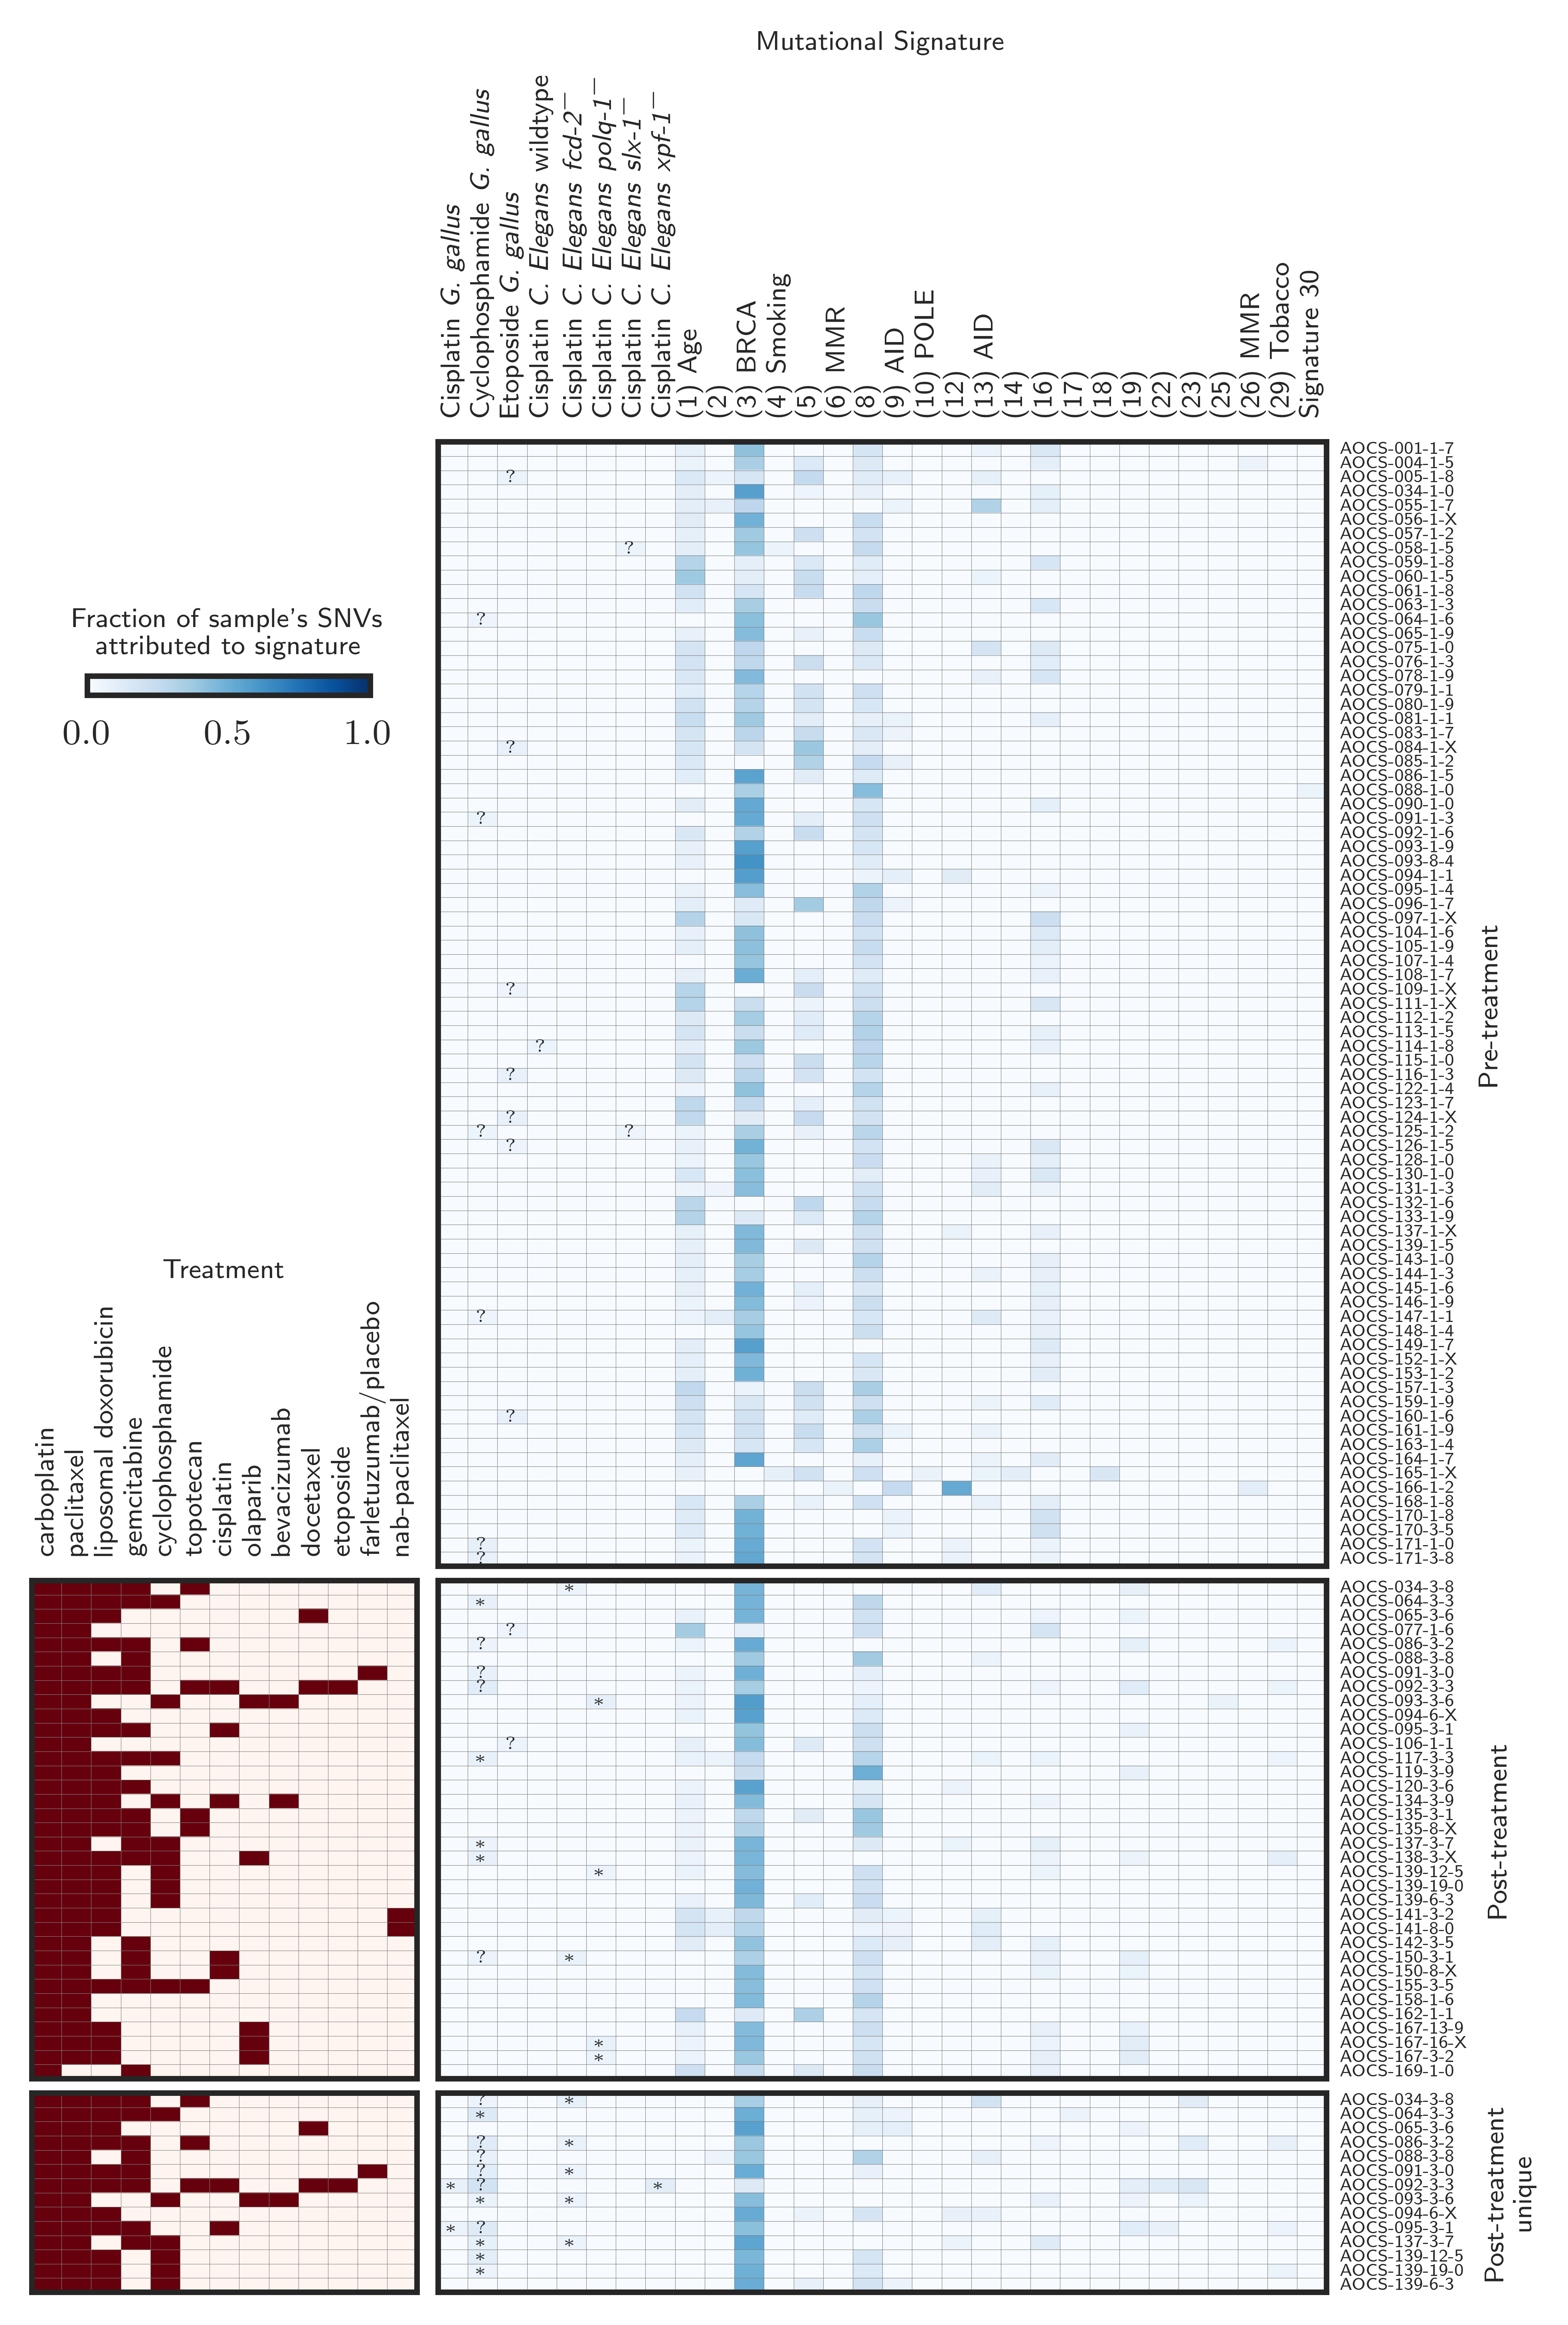

In [10]:
axs = draw_from_chunks([
#    ("Control", df.ix[(df.kind == "check")]),
    ("Pre-treatment", df.ix[(df.kind == "all") & (~df.treated)]),
    ("Post-treatment", (df.ix[(df.kind == "all") & (df.treated)])),
    ("Post-treatment\nunique", (df.ix[(df.kind == "new")]))
], figsize=(5,7.5), symbols=True)
pyplot.tight_layout(h_pad=-7.2, w_pad=0.5)

pyplot.savefig("../figures/supplementary_signatures.pdf")

Removing columns: Signature 4, Signature 6, Signature 10, Signature 14, Signature 18, Signature 25, Signature 26, Etoposide Gallus gallus, Cisplatin C Elegans wildtype, Cisplatin C Elegans polq 1, Cisplatin C Elegans slx 1
[<matplotlib.gridspec.SubplotSpec object at 0x11b79a390>, <matplotlib.gridspec.SubplotSpec object at 0x11b79a400>, <matplotlib.gridspec.SubplotSpec object at 0x11b79a438>, <matplotlib.gridspec.SubplotSpec object at 0x11b79a4a8>]


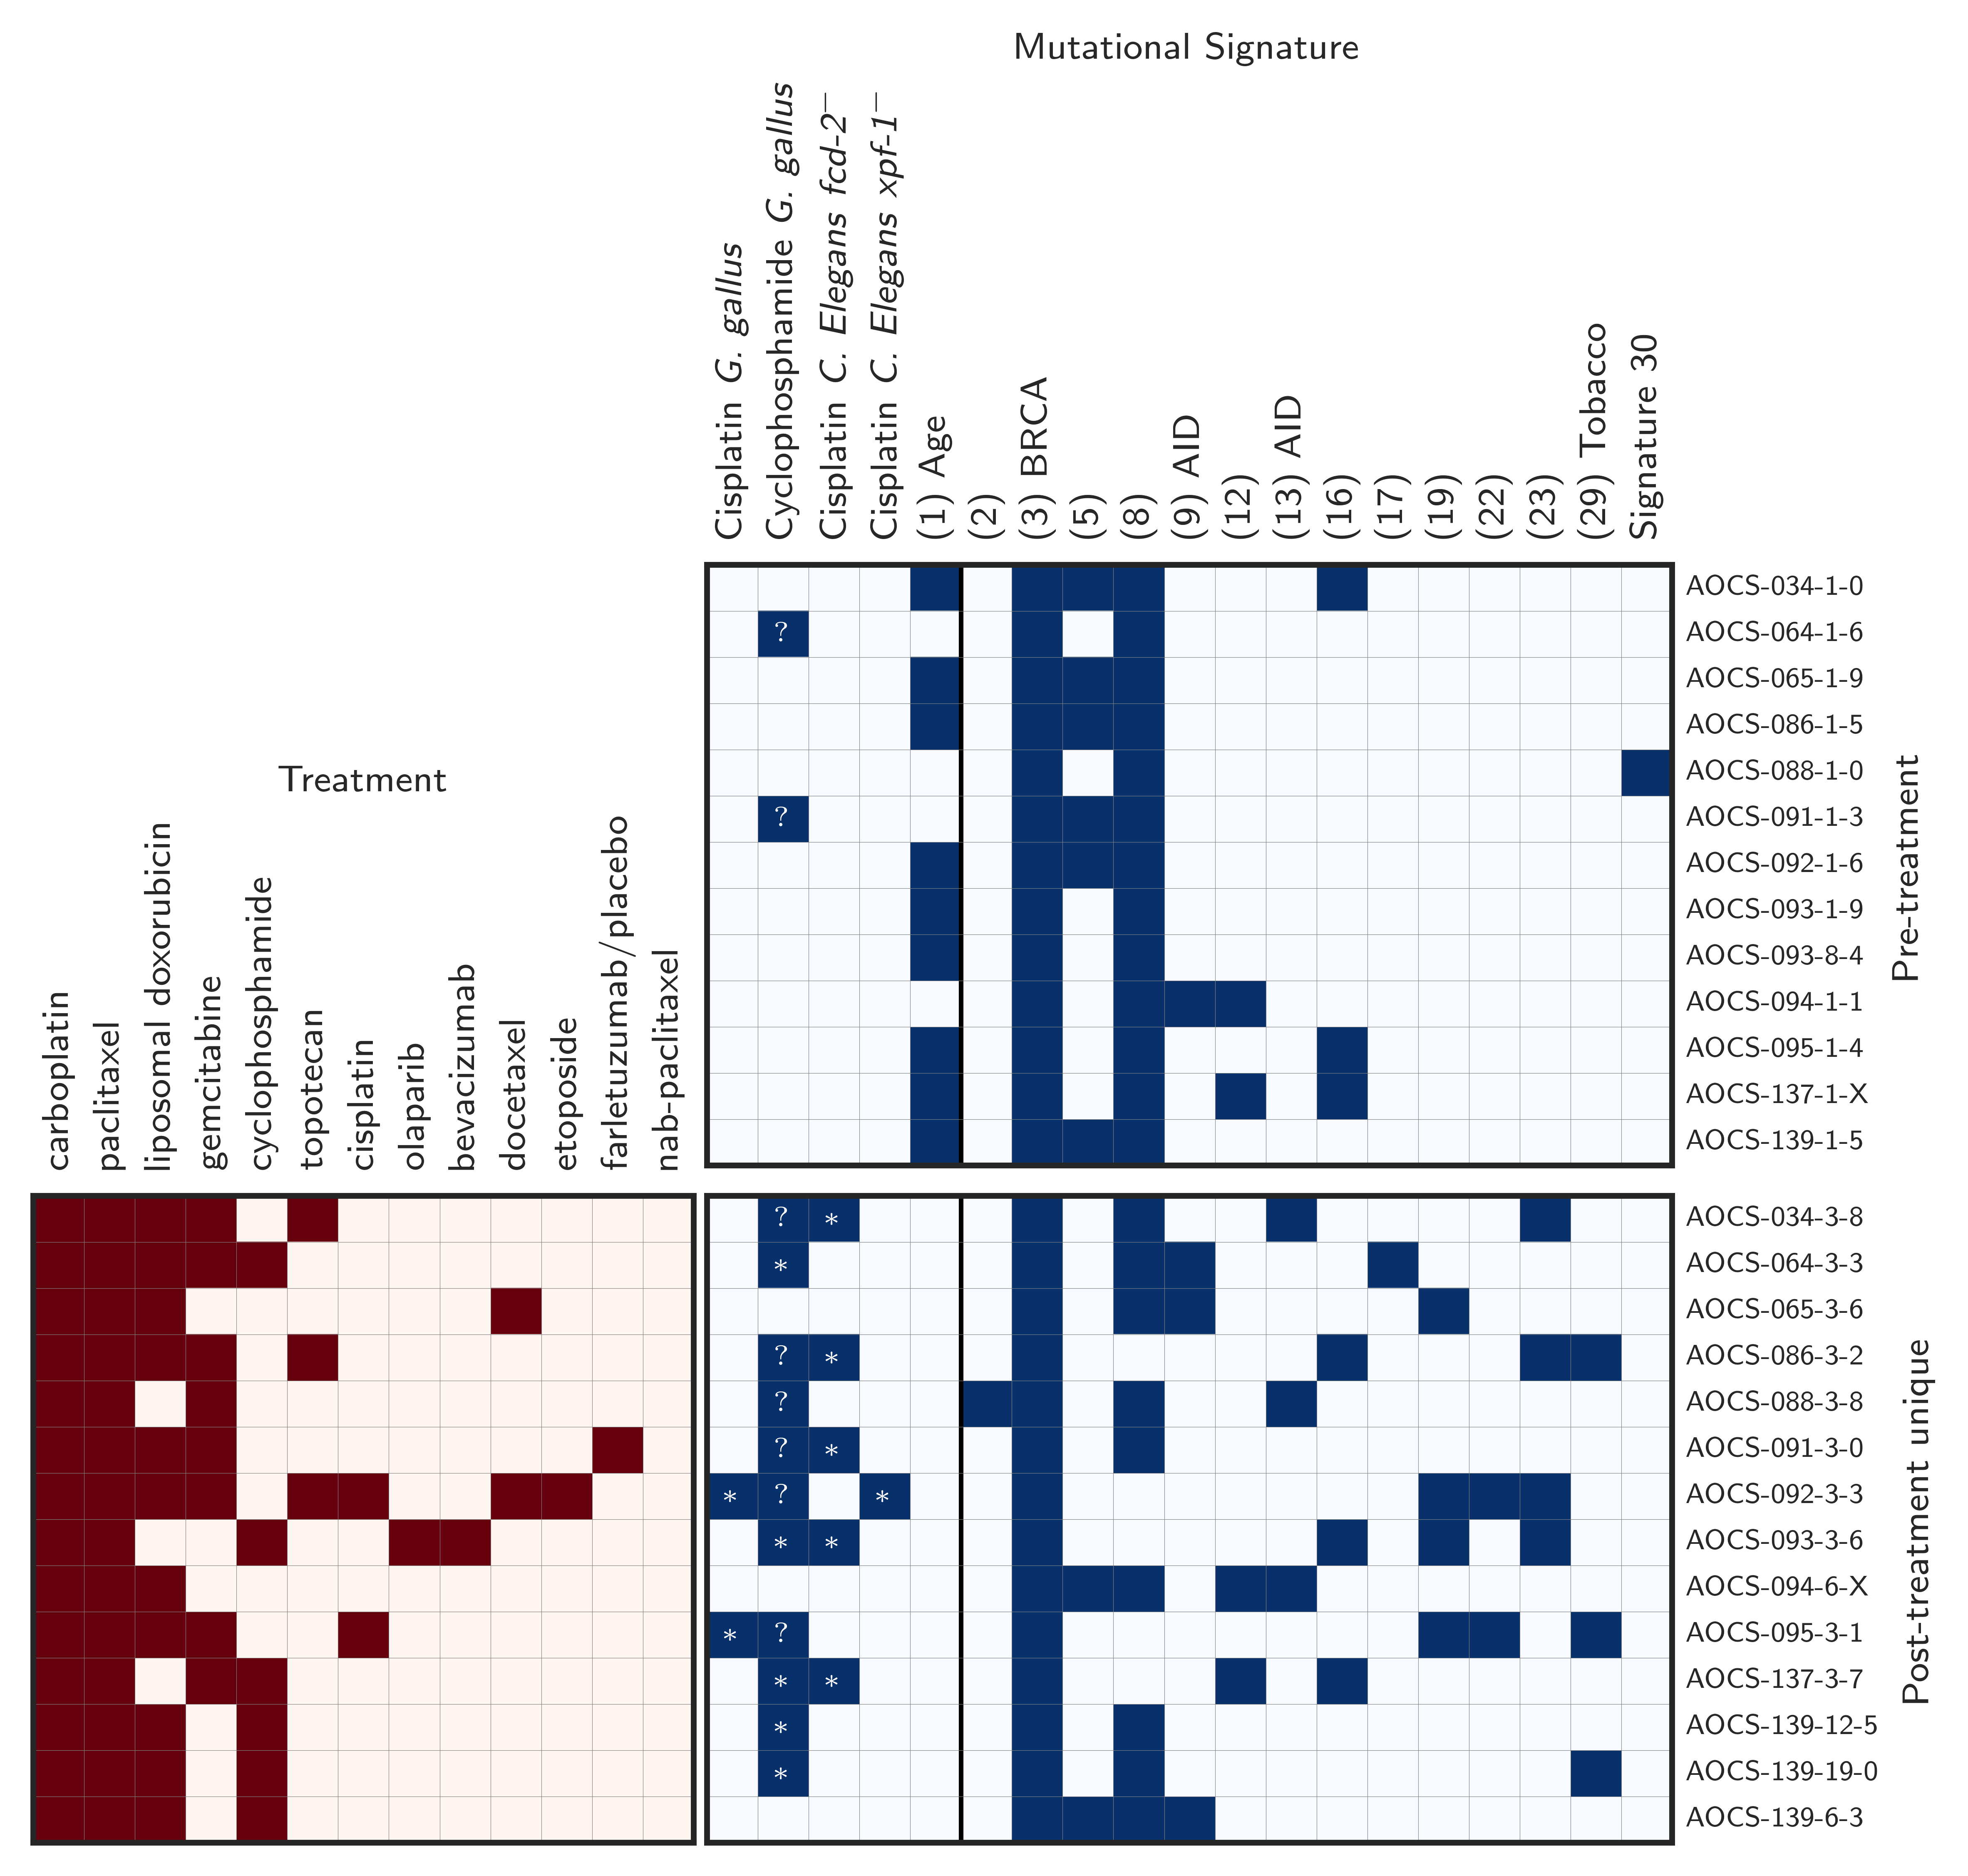

In [11]:
donors_with_new = set("-".join(x[0].split("-")[:2]) for x in df.ix[df.kind == "new"].index)
sub_df = df.ix[["-".join(x[0].split("-")[:2]) in donors_with_new for x in df.index]]
axs = draw_from_chunks([
#    ("Control", df.ix[(df.kind == "check")]),
    ("Pre-treatment", sub_df.ix[(sub_df.kind == "all") & (~sub_df.treated)]),
#    ("Post-treatment", (sub_df.ix[(sub_df.kind == "all") & (sub_df.treated)])),
    ("Post-treatment unique", (sub_df.ix[(sub_df.kind == "new")]))
],
                       figsize=(6,6),
                       cbar=False,
                       binarize=True,
                       cbar_bbox_to_anchor=(-0.125, 1.5, 1.05, 0.95),
                       symbols=True,
                       small_fontsize=6,
                       extra_signature_vlines=[4],
                       symbol_text_kwargs = {'color': 'white'})
pyplot.tight_layout(h_pad=-9.0, w_pad=0.3)
pyplot.savefig("../figures/signatures.pdf")


In [12]:
df.ix[~df.treated][signatures].mean(0).sort(inplace=False, ascending=False)

/Users/tim/miniconda3/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


Signature 3                       0.334127
Signature 8                       0.187788
Signature 1                       0.124668
Signature 5                       0.089357
Signature 16                      0.055934
Signature 13                      0.018603
Signature 9                       0.011523
Signature 12                      0.010245
Etoposide Gallus gallus           0.005567
Cyclophosphamide Gallus gallus    0.004578
Signature 2                       0.003499
Signature 26                      0.001948
Signature 18                      0.001918
Signature 4                       0.001691
Cisplatin C Elegans slx 1         0.001410
Signature 14                      0.001215
Signature 10                      0.000813
Signature 6                       0.000809
Signature 30                      0.000662
Cisplatin C Elegans wildtype      0.000643
Signature 29                      0.000000
Signature 17                      0.000000
Signature 19                      0.000000
Signature 2

In [13]:
for base_sigs in [["Signature 1"], ["Signature 3"], ["Signature 8"], ["Signature 1", "Signature 3", "Signature 8"]]:
    print(base_sigs)
    print("All",
        mean_with_errorbars(df.ix[(df.kind == "all")][base_sigs].sum(1), decimals=3))
    print("Treated",
        mean_with_errorbars(df.ix[(df.kind == "all") & (df.treated)][base_sigs].sum(1), decimals=3))
    print("Untreated",
        mean_with_errorbars(df.ix[(df.kind == "all") & (~df.treated)][base_sigs].sum(1), decimals=3))
    print("New",
        mean_with_errorbars(df.ix[(df.kind == "new") & (df.treated)][base_sigs].sum(1), decimals=3))
    print("")


['Signature 1']
All 0.108 (0.095 - 0.121)
Treated 0.070 (0.050 - 0.093)
Untreated 0.125 (0.110 - 0.140)
New 0.000 (0.000 - 0.000)

['Signature 3']
All 0.352 (0.329 - 0.375)
Treated 0.394 (0.362 - 0.426)
Untreated 0.334 (0.304 - 0.363)
New 0.439 (0.391 - 0.481)

['Signature 8']
All 0.188 (0.172 - 0.202)
Treated 0.187 (0.157 - 0.218)
Untreated 0.188 (0.171 - 0.205)
New 0.092 (0.054 - 0.133)

['Signature 1', 'Signature 3', 'Signature 8']
All 0.648 (0.628 - 0.665)
Treated 0.651 (0.628 - 0.673)
Untreated 0.647 (0.621 - 0.670)
New 0.531 (0.460 - 0.595)



In [14]:
df.columns

Index(['Signature 1', 'Signature 2', 'Signature 3', 'Signature 4',
       'Signature 5', 'Signature 6', 'Signature 8', 'Signature 9',
       'Signature 10', 'Signature 12', 'Signature 13', 'Signature 14',
       'Signature 16', 'Signature 17', 'Signature 18', 'Signature 19',
       'Signature 22', 'Signature 23', 'Signature 25', 'Signature 26',
       'Signature 29', 'Signature 30', 'Cisplatin Gallus gallus',
       'Cyclophosphamide Gallus gallus', 'Etoposide Gallus gallus',
       'Cisplatin C Elegans wildtype', 'Cisplatin C Elegans fcd 2',
       'Cisplatin C Elegans polq 1', 'Cisplatin C Elegans slx 1',
       'Cisplatin C Elegans xpf 1', 'kind', 'source_id', 'treated'],
      dtype='object')

In [15]:
df.ix[df["Cisplatin Gallus gallus"] > 0]

,,Signature 1,Signature 2,Signature 3,Signature 4,Signature 5,Signature 6,Signature 8,Signature 9,Signature 10,Signature 12,Signature 13,Signature 14,Signature 16,Signature 17,Signature 18,Signature 19,Signature 22,Signature 23,Signature 25,Signature 26,Signature 29,Signature 30,Cisplatin Gallus gallus,Cyclophosphamide Gallus gallus,Etoposide Gallus gallus,Cisplatin C Elegans wildtype,Cisplatin C Elegans fcd 2,Cisplatin C Elegans polq 1,Cisplatin C Elegans slx 1,Cisplatin C Elegans xpf 1,kind,source_id,treated
source_id,kind,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-092-3-3,new,0.0,0.0,0.126669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100058,0.115032,0.152028,0.0,0.0,0.000000,0.0,0.076661,0.183630,0.0,0.0,0.0,0.0,0.0,0.104022,new,AOCS-092-3-3,True
AOCS-095-3-1,new,0.0,0.0,0.420330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106145,0.071030,0.000000,0.0,0.0,0.057573,0.0,0.058525,0.121163,0.0,0.0,0.0,0.0,0.0,0.000000,new,AOCS-095-3-1,True
